In [ ]:
!pip install -q kaggle

from google.colab import files

files.upload()

Saving google_stock_price (2004-2023).csv to google_stock_price (2004-2023).csv


{'google_stock_price (2004-2023).csv': b'Date,Open,High,Low,Close,Adj Close,Volume\r\n2004-08-19,2.490664005279541,2.591784954071045,2.3900420665740967,2.4991331100463867,2.4991331100463867,897427216\r\n2004-08-20,2.515820026397705,2.7168169021606445,2.5031180381774902,2.697638988494873,2.697638988494873,458857488\r\n2004-08-23,2.758410930633545,2.8264060020446777,2.7160699367523193,2.7247869968414307,2.7247869968414307,366857939\r\n2004-08-24,2.7706151008605957,2.779581069946289,2.5795810222625732,2.611959934234619,2.611959934234619,306396159\r\n2004-08-25,2.614201068878174,2.689918041229248,2.5873019695281982,2.640104055404663,2.640104055404663,184645512\r\n2004-08-26,2.6139519214630127,2.6886720657348633,2.606729030609131,2.687675952911377,2.687675952911377,142572401\r\n2004-08-27,2.6924080848693848,2.705359935760498,2.632383108139038,2.6438400745391846,2.6438400745391846,124826132\r\n2004-08-30,2.622170925140381,2.6274020671844482,2.540726900100708,2.540726900100708,2.5407269001007

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score, mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense ,Dropout
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from statsmodels.graphics.tsaplots import plot_pacf

In [ ]:
##Data Preprocessing

In [ ]:
data = pd.read_csv('google_stock_price (2004-2023).csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
...,...,...,...,...,...,...,...
4837,2023-11-06,130.220001,131.559998,129.929993,131.449997,131.449997,15360400
4838,2023-11-07,131.979996,133.279999,131.139999,132.399994,132.399994,19223800
4839,2023-11-08,132.360001,133.539993,132.160004,133.259995,133.259995,15093600
4840,2023-11-09,133.360001,133.960007,131.509995,131.690002,131.690002,17976500


In [ ]:
# searching for missing values
df.isnull().sum()

NameError: ignored

In [ ]:
df.info()

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4842.000000,4842.000000,4842.000000,4842.000000,4842.000000,4.842000e+03
mean,41.164402,41.601906,40.745188,41.181457,41.181457,1.192432e+08
std,38.267895,38.708231,37.871644,38.295204,38.295204,1.513840e+08
min,2.470490,2.534002,2.390042,2.490913,2.490913,1.584340e+05
25%,12.819761,12.949089,12.702388,12.828043,12.828043,2.867350e+07
50%,26.470161,26.668148,26.259000,26.470153,26.470153,6.202500e+07
75%,57.197751,57.729501,56.633139,57.315001,57.315001,1.469819e+08
max,151.863495,152.100006,149.887497,150.709000,150.709000,1.650833e+09


In [ ]:
##Exploratory Data Analysis (EDA)

In [ ]:
# Line chart for Google stock price over time
import plotly.express as px

fig1 = px.line(data, x='Date', y='Close', title='Google Stock Price Over Time')
fig1.show()

In [ ]:
# Scatter plot of daily trading volume
fig2 = px.scatter(data, x='Date', y='Volume', title='Daily Trading Volume')
fig2.show()

In [ ]:
# Box plot of Google stock prices for each year
import pandas as pd
import plotly.express as px

# Convert "Date" column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Extract year from "Date" column
data['Year'] = data['Date'].dt.year

fig3 = px.box(data, x='Year', y='Close', title='Google Stock Prices - Yearly Box Plot')
fig3.show()

In [ ]:
# Histogram of daily returns
data['Daily_Return'] = data['Close'].pct_change()
fig5 = px.histogram(data, x='Daily_Return', nbins=30, title='Distribution of Daily Returns')
fig5.show()

In [ ]:
# Heatmap of correlation matrix
correlation_matrix = data.corr()
fig6 = px.imshow(correlation_matrix, x=correlation_matrix.index, y=correlation_matrix.columns, title='Correlation Matrix Heatmap')
fig6.show()

In [ ]:
# Moving average of closing prices
import pandas as pd
import plotly.express as px
import numpy as np

data = pd.read_csv('google_stock_price (2004-2023).csv')
# Convert "Date" column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Extract year from "Date" column
data['Year'] = data['Date'].dt.year

# Moving average of closing prices
data['MA_50'] = data['Close'].rolling(window=50).mean()
fig7 = px.line(data, x='Date', y=['Close', 'MA_50'], title='Google Stock Price with 50-Day Moving Average')
fig7.show()


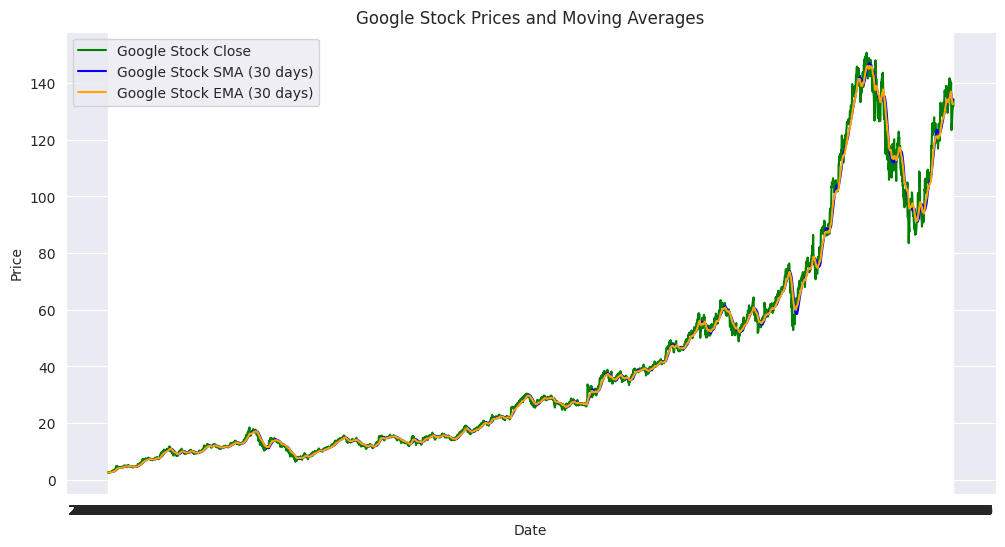

In [ ]:
# Calculate the simple moving averages (SMA)
sma_window = 30  # Adjust the window size based on your preference
df['SMA'] = df['Close'].rolling(window=sma_window).mean()

# Calculate the exponential moving averages (EMA)
ema_window = 30  # Adjust the window size based on your preference
df['EMA'] = df['Close'].ewm(span=ema_window, adjust=False).mean()

# Plotting
plt.figure(figsize=(12, 6))

# Plot Google stock prices and moving averages
plt.plot(df['Date'], df['Close'], label='Google Stock Close', color='green')
plt.plot(df['Date'], df['SMA'], label=f'Google Stock SMA ({sma_window} days)', color='blue')
plt.plot(df['Date'], df['EMA'], label=f'Google Stock EMA ({ema_window} days)', color='orange')
plt.title('Google Stock Prices and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()

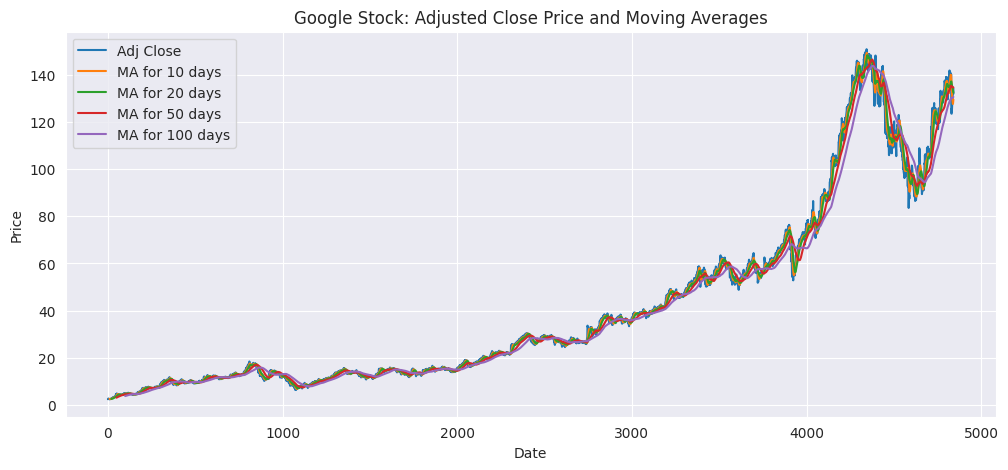

In [ ]:
# Calculate moving averages for different windows
data['MA for 10 days'] = data['Open'].rolling(10).mean()
data['MA for 20 days'] = data['Open'].rolling(20).mean()
data['MA for 50 days'] = data['Open'].rolling(50).mean()
data['MA for 100 days'] = data['Open'].rolling(100).mean()

# Truncate the data if needed
truncated_data = data.truncate()

# Plot the adjusted close price and moving averages
truncated_data[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'MA for 100 days']].plot(subplots=False, figsize=(12, 5))

# Set the title and axis labels
plt.title('Google Stock: Adjusted Close Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')

# Display the plot
plt.show()

In [ ]:
# Scatter plot of closing prices vs. trading volume
fig8 = px.scatter(data, x='Close', y='Volume', title='Closing Prices vs. Trading Volume')
fig8.show()

In [ ]:
# Line chart for daily stock price change
data['Daily_Change'] = data['Close'].diff()
fig9 = px.line(data, x='Date', y='Daily_Change', title='Daily Stock Price Change')
fig9.show()

In [ ]:
# Bar chart of trading volume per month
data['Month'] = data['Date'].dt.month
monthly_volume = data.groupby('Month')['Volume'].sum().reset_index()
fig10 = px.bar(monthly_volume, x='Month', y='Volume', title='Total Trading Volume per Month')
fig10.show()

In [ ]:
# Area chart for daily trading volume
fig11 = px.area(data, x='Date', y='Volume', title='Daily Trading Volume (Area Chart)')
fig11.show()

In [ ]:
# Line chart for daily stock price percent change
data['Daily_Pct_Change'] = data['Close'].pct_change() * 100
fig13 = px.line(data, x='Date', y='Daily_Pct_Change', title='Daily Stock Price Percent Change')
fig13.show()

In [ ]:
# Box plot of daily stock price percent change by month
fig14 = px.box(data, x='Month', y='Daily_Pct_Change', title='Daily Stock Price Percent Change by Month')
fig14.show()

In [ ]:
# Scatter plot of closing prices with trendline
fig15 = px.scatter(data, x='Date', y='Close', title='Google Stock Prices with Trendline', trendline='lowess')
fig15.show()

In [ ]:
# Line chart for daily trading volume with moving average
data['MA_Volume'] = data['Volume'].rolling(window=10).mean()
fig16 = px.line(data, x='Date', y=['Volume', 'MA_Volume'], title='Daily Trading Volume with 10-Day Moving Average')
fig16.show()

In [ ]:
# Line chart for daily closing prices in 2022
df_2022 = data[data['Year'] == 2022]
fig18 = px.line(data, x='Date', y='Close', title='Google Stock Prices in 2022')
fig18.show()

In [ ]:
##LSTM

In [ ]:
data1= pd.read_csv('google_stock_price (2004-2023).csv')
data1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
...,...,...,...,...,...,...,...
4837,2023-11-06,130.220001,131.559998,129.929993,131.449997,131.449997,15360400
4838,2023-11-07,131.979996,133.279999,131.139999,132.399994,132.399994,19223800
4839,2023-11-08,132.360001,133.539993,132.160004,133.259995,133.259995,15093600
4840,2023-11-09,133.360001,133.960007,131.509995,131.690002,131.690002,17976500


In [ ]:
data_copy=data1.copy()

In [ ]:
import math
data = data_copy.filter(['Close'])
dataset = data.values #convert the data frame to a numpy array
training_data_len = math.ceil(len(dataset)*.8)  # number of rows to train the model on
training_data_len

3874

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[5.54601395e-05],
       [1.39474256e-03],
       [1.57790515e-03],
       ...,
       [8.82274792e-01],
       [8.71682346e-01],
       [8.87672264e-01]])

In [ ]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([5.54601395e-05, 1.39474256e-03, 1.57790515e-03, 8.16681841e-04,
       1.00656502e-03, 1.32752381e-03, 1.03177125e-03, 3.36085743e-04,
       3.96579086e-04, 4.03331846e-05, 2.52062297e-04, 0.00000000e+00,
       2.63827349e-04, 3.84818860e-04, 3.86498202e-04, 8.93979873e-04,
       1.25862571e-03, 1.92911142e-03, 2.01480938e-03, 2.34584744e-03,
       2.93735417e-03, 3.25158754e-03, 2.99616656e-03, 3.08690416e-03,
       3.49692925e-03, 3.33056652e-03, 3.06674561e-03, 4.51189259e-03,
       5.22102410e-03, 4.97232210e-03, 5.47308479e-03, 5.88982081e-03,
       6.44603560e-03, 6.22926685e-03, 6.52669393e-03, 6.33849170e-03,
       5.92343341e-03, 6.28303960e-03, 6.87117960e-03, 7.05602153e-03,
       7.41058809e-03, 8.25919514e-03, 8.05418662e-03, 6.80228150e-03,
       8.29616160e-03, 1.21695001e-02, 1.46850625e-02, 1.37440385e-02,
       1.44447685e-02, 1.56765022e-02, 1.52295171e-02, 1.61352524e-02,
       1.59403296e-02, 1.54025956e-02, 1.42313536e-02, 1.16519311e-02,
     

In [ ]:
model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(128))
model.add(Dropout(0.2))


model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 256)           264192    
                                                                 
 dropout (Dropout)           (None, 60, 256)           0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 128)           197120    
                                                                 
 dropout_1 (Dropout)         (None, 60, 128)           0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 128)           131584    
                                                                 
 dropout_2 (Dropout)         (None, 60, 128)           0         
                                                                 
 lstm_3 (LSTM)               (None, 128)               1

In [ ]:
# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
120/120 [==============================] - 74s 543ms/step - loss: 0.0018
Epoch 2/10
120/120 [==============================] - 68s 563ms/step - loss: 2.4229e-04
Epoch 3/10
120/120 [==============================] - 65s 538ms/step - loss: 2.5370e-04
Epoch 4/10
120/120 [==============================] - 74s 614ms/step - loss: 2.2384e-04
Epoch 5/10
120/120 [==============================] - 67s 557ms/step - loss: 1.8397e-04
Epoch 6/10
120/120 [==============================] - 66s 547ms/step - loss: 2.0417e-04
Epoch 7/10
120/120 [==============================] - 68s 565ms/step - loss: 2.0720e-04
Epoch 8/10
120/120 [==============================] - 65s 539ms/step - loss: 1.7809e-04
Epoch 9/10
120/120 [==============================] - 67s 559ms/step - loss: 1.9899e-04
Epoch 10/10
120/120 [==============================] - 67s 557ms/step - loss: 1.6082e-04


In [ ]:
from sklearn.metrics import mean_absolute_error


test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print("RMSE: {:.4f}".format(rmse))
print("MAE: {:.4f}".format(mae))
print("MSE: {:.4f}".format(mse))
print("R2 Score: {:.4f}".format(r2))

31/31 [==============================] - 9s 209ms/step
RMSE: 5.2012
MAE: 3.9570
MSE: 27.0520
R2 Score: 0.9574


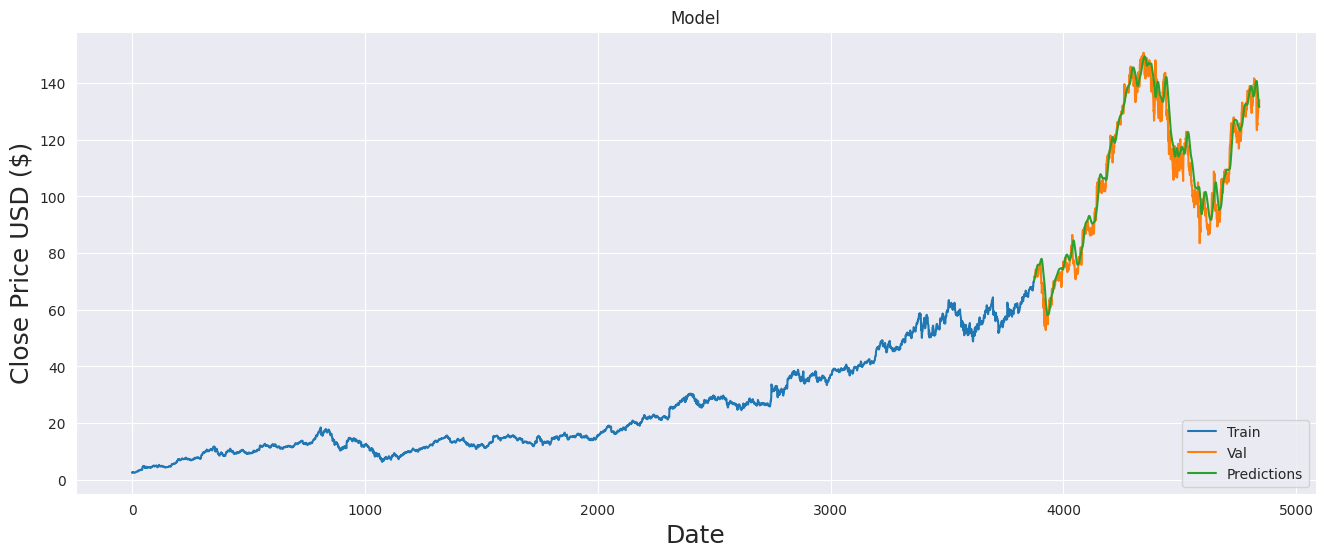

In [ ]:
train = data[:training_data_len]
val = data[training_data_len:]
val['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(val[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
val

,Close,Predictions
3874,70.991501,70.418243
3875,71.486504,70.610535
3876,71.961502,70.871826
3877,71.543999,71.198624
3878,71.959999,71.574196
...,...,...
4837,131.449997,133.692780
4838,132.399994,132.747375
4839,133.259995,132.072922
4840,131.690002,131.687469
